In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import random
import math

In [3]:
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

Reading the training set

In [4]:
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))

60000


Reading the test set

In [6]:
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))

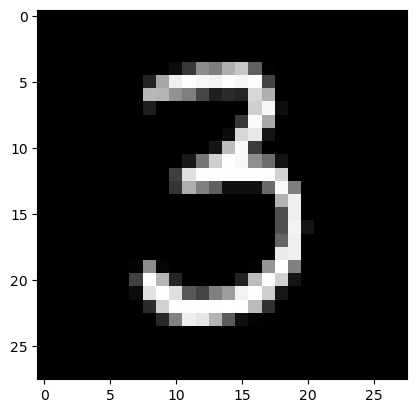

In [30]:

show_image(train_set[50][0])
plt.show()

In [7]:
pics_array = []
for i in range(100):
    pics_array.append(train_set[i][0])

y = []
for i in range(100):
    y.append(train_set[i][1])

Sigmoid

In [8]:
def sigmoid(x):
  sig = 1 / (1 + np.exp(-x))
  return sig

Sigmoid derivative

In [9]:
def d_sigmoid(x):
  s = sigmoid(x)
  return s*(1-s)

Feed Forward

In [44]:
correct_num = 0
z = 0

for i in pics_array:
    a0 = i.reshape(-1,1)

    w0 = np.random.normal(size=(16, 784))
    b0 = [[0]*1]*16

    a1 = sigmoid(np.matmul(w0, a0) + b0)

    w1 = np.random.normal(size=(16, 16))
    b1 = [[0]*1]*16

    a2 = sigmoid(np.matmul(w1, a1) + b1)

    w2 = np.random.normal(size=(10, 16))
    b2 = [[0]*1]*10

    a3 = sigmoid(np.matmul(w2, a2) + b2)

    if a3.argmax() == train_set[z][1].argmax():
        correct_num += 1
    z += 1
    
acc = correct_num/100
print(acc)

0.11


BackPropagation

[0.900638869486798, 0.8290419413854057, 0.8466527407934253, 0.827645499205886, 0.8199217602387655, 0.8101278107065771, 0.8049909198835171, 0.8529811452491407, 0.8049017610903025, 0.7733257213913407, 0.8157908097643033, 0.7792507123274873, 0.7253564876534807, 0.8067718053558864, 0.8014775718779028, 0.7164333473382838, 0.7724734401100183, 0.7439407125535635, 0.7440432657864551, 0.7441749595265086]
runtime:  149.33630466461182
0.41


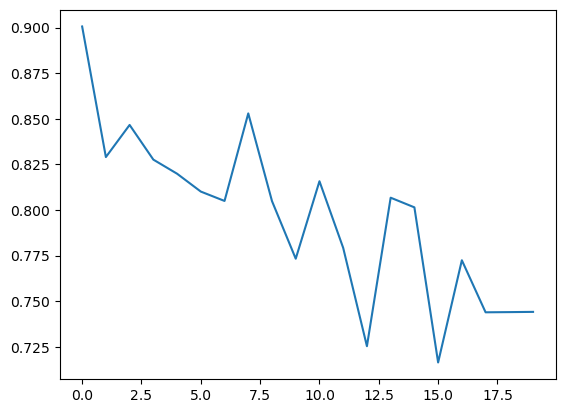

In [45]:
batch_size = 10
learning_rate = 1 
epoch = 20


w0 = np.random.normal(size=(16, 784))
b0 = [[0]*1]*16

w1 = np.random.normal(size=(16, 16))
b1 = [[0]*1]*16

w2 = np.random.normal(size=(10, 16))
b2 = [[0]*1]*10

loss = []
start = time.time()


for i in range(epoch):
    a0 = []
    y = []
    random.shuffle(train_set)
    
    for i in range(100):
        a0.append(train_set[i][0])

    for i in range(100):
        y.append(train_set[i][1])

    
    for b in range(10): #100/10 = 10 : number of batches
        # make the batches
        batch = a0[b*10 : (b+1)*10]
        y_batch = y[b*10:(b+1)*10]

        grad_w0 = np.zeros((16, 784))
        grad_b0 = np.zeros((16, 1))
        grad_w1 = np.zeros((16, 16))
        grad_b1 = np.zeros((16, 1))
        grad_w2 = np.zeros((10, 16))
        grad_b2 = np.zeros((10, 1))
        

        for n in range(batch_size): #each image in batch
            image = batch[n].reshape(-1,1)
            out = y_batch[n].reshape(-1,1)

            
            z1 = np.matmul(w0, image) + b0
            a1 = sigmoid(z1)
            z2 = np.matmul(w1, a1) + b1
            a2 = sigmoid(z2)
            z3 = np.matmul(w2, a2) + b2
            a3 = sigmoid(z3)


            #chain rule
            for j in range(10):
                for k in range(16):
                    grad_w2[j, k] += a2[k, 0] * d_sigmoid(z3[j, 0]) * ((2 * a3[j, 0]) - (2 * out[j, 0]))
            
            for j in range(10):
                grad_b2[j, 0] += d_sigmoid(z3[j, 0]) * ((2 * a3[j, 0]) - (2 * out[j, 0]))
            
            grad_a3 = np.zeros((16,1))
            for j in range(16):
                for k in range(10):
                    grad_a3[j, 0] += ((2 * a3[k, 0]) - (2 * out[k, 0])) * d_sigmoid(z3[k, 0]) * w2[k, j]
            
            for j in range(16):
                for k in range(16):
                    grad_w1[j, k] += a1[k, 0] * d_sigmoid(z2[j, 0]) * grad_a3[j, 0]
            
            for j in range(16):
                grad_b1[j, 0] += d_sigmoid(z2[j, 0]) * grad_a3[j, 0]
            
            grad_a2 = np.zeros((16, 1))
            for j in range(16):
                for k in range(16):
                    grad_a2[j, 0] += grad_a3[k, 0] * d_sigmoid(z2[k, 0]) * w1[k, j]
            
            for j in range(16):
                for k in range(784):
                    grad_w0[j, k] += image[k, 0] * d_sigmoid(z1[j, 0]) * grad_a2[j, 0]

            for j in range(16):
                grad_b0[j, 0] += d_sigmoid(z1[j, 0]) * grad_a2[j, 0]
            
        w0 = w0 - (learning_rate*(grad_w0/batch_size))
        b0 = b0 - (learning_rate*(grad_b0/batch_size))
        w1 = w1 - (learning_rate*(grad_w1/batch_size))
        b1 = b1 - (learning_rate*(grad_b1/batch_size))
        w2 = w2 - (learning_rate*(grad_w2/batch_size))
        b2 = b2 - (learning_rate*(grad_b2/batch_size))
   
    cost = 0
    for data in train_set[:100]:
        image = data[0].reshape(-1, 1)
        z1 = np.matmul(w0, image) + b0
        a1 = sigmoid(z1)
        z2 = np.matmul(w1, a1) + b1
        a2 = sigmoid(z2)
        z3 = np.matmul(w2, a2) + b2
        a3 = sigmoid(z3)

        for j in range (0, 10):
            cost += ((a3[j, 0] - data[1].reshape(-1,1)[j, 0]) **2)

    loss.append(cost/100)


correct_num = 0
for data in train_set[:100]:
    image = data[0].reshape(-1, 1)
    z1 = np.matmul(w0, image) + b0
    a1 = sigmoid(z1)
    z2 = np.matmul(w1, a1) + b1
    a2 = sigmoid(z2)
    z3 = np.matmul(w2, a2) + b2
    a3 = sigmoid(z3)

    if a3.argmax() == data[1].argmax():
        correct_num += 1
end = time.time()

print("runtime: ", end-start)   
epoch_size = [x for x in range(epoch)]
plt.plot(epoch_size, loss)

acc = correct_num/100 
print("accuracy: ", acc)



Vectorization

runtime:  33.66584491729736
accuracy:  0.87


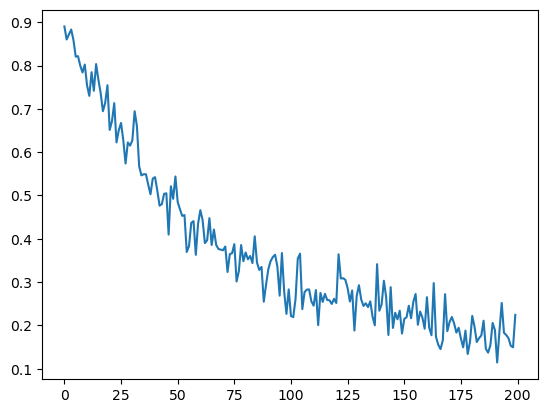

In [50]:
batch_size = 10
learning_rate = 1 
#epoch = 20
epoch = 200
train_set_num = 100
batch_num = math.floor(train_set_num / batch_size)


w0 = np.random.normal(size=(16, 784))
b0 = [[0]*1]*16

w1 = np.random.normal(size=(16, 16))
b1 = [[0]*1]*16

w2 = np.random.normal(size=(10, 16))
b2 = [[0]*1]*10

loss = []
start = time.time()


for i in range(epoch):
    a0 = []
    y = []
    random.shuffle(train_set)
    
    for i in range(train_set_num):
        a0.append(train_set[i][0])

    for i in range(train_set_num):
        y.append(train_set[i][1])

    
    for b in range(batch_num): 
        # make the batches
        batch = a0[b*batch_size : (b+1)*batch_size]
        y_batch = y[b*batch_size:(b+1)*batch_size]

        grad_w0 = np.zeros((16, 784))
        grad_b0 = np.zeros((16, 1))
        grad_w1 = np.zeros((16, 16))
        grad_b1 = np.zeros((16, 1))
        grad_w2 = np.zeros((10, 16))
        grad_b2 = np.zeros((10, 1))
        

        for n in range(batch_size): #each image in batch
            image = batch[n].reshape(-1,1)
            out = y_batch[n].reshape(-1,1)

            
            z1 = np.matmul(w0, image) + b0
            a1 = sigmoid(z1)
            z2 = np.matmul(w1, a1) + b1
            a2 = sigmoid(z2)
            z3 = np.matmul(w2, a2) + b2
            a3 = sigmoid(z3)


            grad_w2 += (2 * d_sigmoid(z3) * (a3 - out)) @ (np.transpose(a2))
            grad_b2 += d_sigmoid(z3) * ((2 * a3) - (2 * out))
            grad_a3 = np.zeros((16, 1))
            grad_a3 += (np.transpose(w2)) @ (((2 * a3) - (2 * out)) * d_sigmoid(z3))
            grad_w1 += (d_sigmoid(z2) * grad_a3) @ (np.transpose(a1))
            grad_b1 += d_sigmoid(z2) * grad_a3
            grad_a2 = np.zeros((16, 1))
            grad_a2 += np.transpose(w1) @ (2 * d_sigmoid(z2) * grad_a3)
            grad_w0 += d_sigmoid(z1) * grad_a2 @ (np.transpose(image))
            grad_b0 += d_sigmoid(z1) * grad_a2
            

        w0 = w0 - (learning_rate*(grad_w0/batch_size))
        b0 = b0 - (learning_rate*(grad_b0/batch_size))
        w1 = w1 - (learning_rate*(grad_w1/batch_size))
        b1 = b1 - (learning_rate*(grad_b1/batch_size))
        w2 = w2 - (learning_rate*(grad_w2/batch_size))
        b2 = b2 - (learning_rate*(grad_b2/batch_size))
   
    cost = 0
    for data in train_set[:train_set_num]:
        image = data[0].reshape(-1, 1)
        z1 = np.matmul(w0, image) + b0
        a1 = sigmoid(z1)
        z2 = np.matmul(w1, a1) + b1
        a2 = sigmoid(z2)
        z3 = np.matmul(w2, a2) + b2
        a3 = sigmoid(z3)

        for j in range (10):
            cost += ((a3[j, 0] - data[1].reshape(-1,1)[j, 0]) **2)

    loss.append(cost/train_set_num)


correct_num = 0
for data in train_set[:train_set_num]:
    image = data[0].reshape(-1, 1)
    z1 = np.matmul(w0, image) + b0
    a1 = sigmoid(z1)
    z2 = np.matmul(w1, a1) + b1
    a2 = sigmoid(z2)
    z3 = np.matmul(w2, a2) + b2
    a3 = sigmoid(z3)

    if a3.argmax() == data[1].argmax():
        correct_num += 1
end = time.time()

print("runtime: ", end-start)   
epoch_size = [x for x in range(epoch)]
plt.plot(epoch_size, loss)

acc = correct_num/train_set_num
print("accuracy: ", acc)


BackPropagation vectorized as a function -
runs for all of the set

In [52]:
def vectorized(batch_size, learning_rate, epoch, set):
    
    set_num = len(set)
    batch_num = math.floor(set_num / batch_size)

    w0 = np.random.normal(size=(16, 784))
    b0 = [[0]*1]*16

    w1 = np.random.normal(size=(16, 16))
    b1 = [[0]*1]*16

    w2 = np.random.normal(size=(10, 16))
    b2 = [[0]*1]*10

    loss = []
    start = time.time()


    for i in range(epoch):
        a0 = []
        y = []
        random.shuffle(set)
        
        for i in range(set_num):
            a0.append(set[i][0])

        for i in range(set_num):
            y.append(set[i][1])

        
        for b in range(batch_num): 
            # make the batches
            batch = a0[b*batch_size : (b+1)*batch_size]
            y_batch = y[b*batch_size:(b+1)*batch_size]

            grad_w0 = np.zeros((16, 784))
            grad_b0 = np.zeros((16, 1))
            grad_w1 = np.zeros((16, 16))
            grad_b1 = np.zeros((16, 1))
            grad_w2 = np.zeros((10, 16))
            grad_b2 = np.zeros((10, 1))
            

            for n in range(batch_size): #each image in batch
                image = batch[n].reshape(-1,1)
                out = y_batch[n].reshape(-1,1)

                
                z1 = np.matmul(w0, image) + b0
                a1 = sigmoid(z1)
                z2 = np.matmul(w1, a1) + b1
                a2 = sigmoid(z2)
                z3 = np.matmul(w2, a2) + b2
                a3 = sigmoid(z3)


                #chain rule
                grad_w2 += (2 * d_sigmoid(z3) * (a3 - out)) @ (np.transpose(a2))
                grad_b2 += d_sigmoid(z3) * ((2 * a3) - (2 * out))
                grad_a3 = np.zeros((16, 1))
                grad_a3 += (np.transpose(w2)) @ (((2 * a3) - (2 * out)) * d_sigmoid(z3))
                grad_w1 += (d_sigmoid(z2) * grad_a3) @ (np.transpose(a1))
                grad_b1 += d_sigmoid(z2) * grad_a3
                grad_a2 = np.zeros((16, 1))
                grad_a2 += np.transpose(w1) @ (2 * d_sigmoid(z2) * grad_a3)
                grad_w0 += d_sigmoid(z1) * grad_a2 @ (np.transpose(image))
                grad_b0 += d_sigmoid(z1) * grad_a2
                

            w0 = w0 - (learning_rate*(grad_w0/batch_size))
            b0 = b0 - (learning_rate*(grad_b0/batch_size))
            w1 = w1 - (learning_rate*(grad_w1/batch_size))
            b1 = b1 - (learning_rate*(grad_b1/batch_size))
            w2 = w2 - (learning_rate*(grad_w2/batch_size))
            b2 = b2 - (learning_rate*(grad_b2/batch_size))
    
        cost = 0
        for data in set[:set_num]:
            image = data[0].reshape(-1, 1)
            z1 = np.matmul(w0, image) + b0
            a1 = sigmoid(z1)
            z2 = np.matmul(w1, a1) + b1
            a2 = sigmoid(z2)
            z3 = np.matmul(w2, a2) + b2
            a3 = sigmoid(z3)

            for j in range (10):
                cost += ((a3[j, 0] - data[1].reshape(-1,1)[j, 0]) **2)

        loss.append(cost/set_num)


    correct_num = 0
    for data in set[:set_num]:
        image = data[0].reshape(-1, 1)
        z1 = np.matmul(w0, image) + b0
        a1 = sigmoid(z1)
        z2 = np.matmul(w1, a1) + b1
        a2 = sigmoid(z2)
        z3 = np.matmul(w2, a2) + b2
        a3 = sigmoid(z3)

        if a3.argmax() == data[1].argmax():
            correct_num += 1
    end = time.time()
    accuracy = correct_num/set_num

    epoch_size = [x for x in range(epoch)]
    plt.plot(epoch_size, loss)

    runtime = end-start
    
    return (runtime, accuracy)

    

runtime:  96.6500494480133
accuracy:  0.915


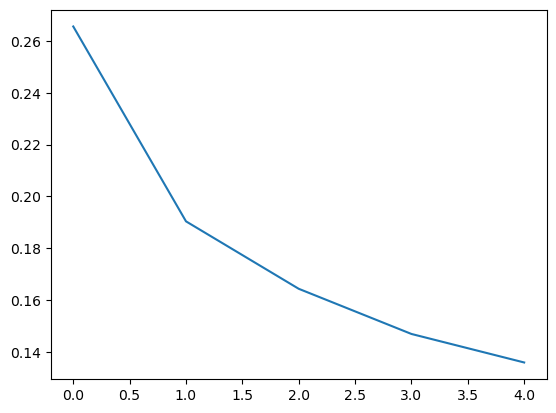

In [53]:
runtime, acc = vectorized(50, 1, 5, train_set)
print("runtime: ", runtime)
print("accuracy: ", acc)

runtime:  15.301103353500366
accuracy:  0.8544


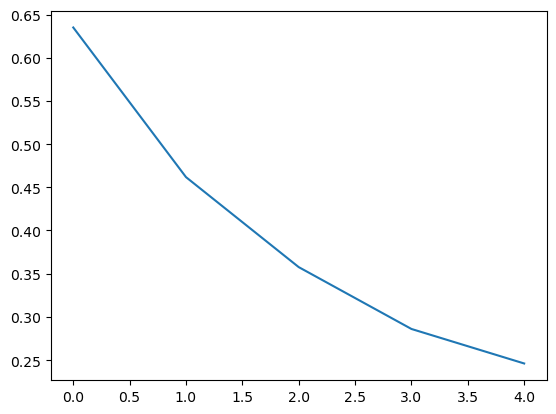

In [54]:
runtime, acc = vectorized(50, 1, 5, test_set)
print("runtime: ", runtime)
print("accuracy: ", acc)